In [1]:
import numpy as np
from igraph import *
import time
import networkx as nx
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt


def convert_to_adjacency(matrix):
    start = 0
    res = []
    lst = []
    n = matrix.shape[0]

    for i in range(n):
        res.append(lst*n)
    while start < n:
        y = matrix[start]
        for i in range(len(y)):
            if y[i] == 1:
                res[start].append(i)
        start += 1
    return res


def check_time(function, args):
    start = time.time()
    result =function(*args)
    delta = time.time() - start
    #print("seconds : ", delta)
    return result, delta

# Problem I

Generate graph

In [2]:
N = 100

g = Graph()
g.add_vertices(N)
edges = [(i, j) for i, j in zip(np.random.randint(0, N, N * 2), np.random.randint(0, N, N * 2))]
g.add_edges(edges)

adjacency_matrix = g.get_adjacency() # adjacency matrix
adjacency_list = convert_to_adjacency(adjacency_matrix) # adjacency list

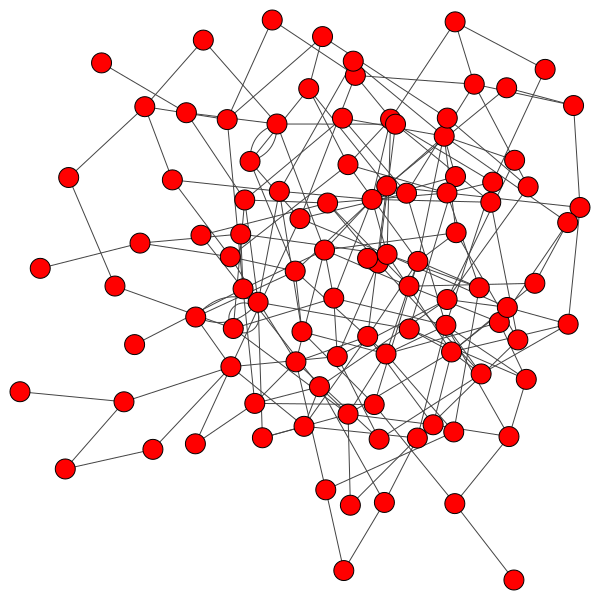

In [3]:
layout = g.layout("kk")
plot(g, layout=layout)

In [4]:
print('adjacency_matrix : \n\n', adjacency_matrix[4:6])
print('\n\nadjacency_list : \n\n', adjacency_list[4:6])

adjacency_matrix : 

 [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


adjacency_list : 

 [[13, 60, 99], [11, 12, 40, 54, 75]]


In [5]:
adjacency_dict = {key : adjacency_list[key] for key in range(N)}

In [6]:
def dfs(adjacencyList, vertex, search = None, visitedSet = None, path = None): 
    # create memo once in top-level call
    if visitedSet is None:
        visitedSet = set()
    if path is None:
        path = []
        
    visitedSet.add(vertex)
    path.append(vertex)        
        
    if vertex in adjacencyList and search not in visitedSet:
        for neighbor in adjacencyList[vertex]:
            if neighbor not in visitedSet and search not in visitedSet:
                dfs(adjacencyList, neighbor, search, visitedSet, path)
    return path


def bfs(graph, node, search = None):
    visited = []
    queue = []

    visited.append(node)
    queue.append(node)

    while queue:        
        s = queue.pop(0) 
        
        for neighbour in graph[s]:
            if neighbour not in visited and search not in visited:
                visited.append(neighbour)
                queue.append(neighbour)
    return visited

In [7]:
G = nx.Graph()
for i in range(adjacency_matrix.shape[0]): 
    for j in range(adjacency_matrix.shape[1]): 
        if adjacency_matrix[i][j] == 1: 
            G.add_edge(i,j) 

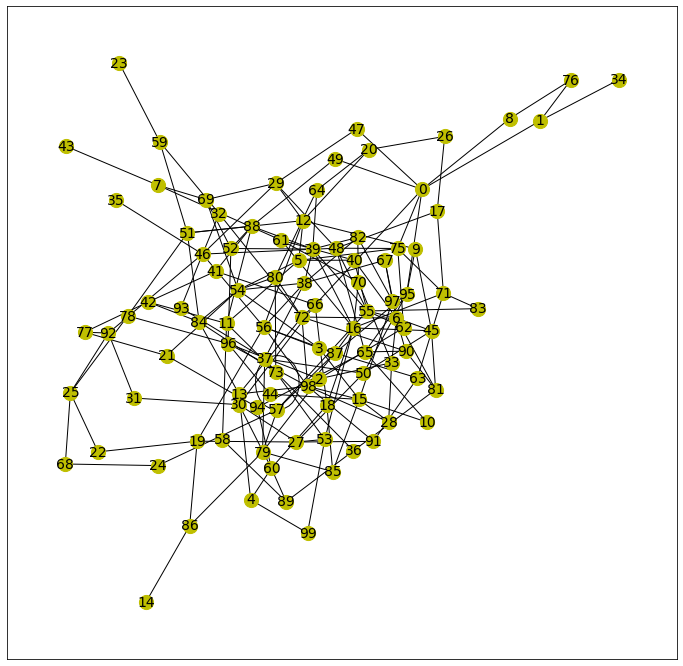

In [31]:
plt.figure(figsize=(12, 12))
nx.drawing.nx_pylab.draw_networkx(G,
                                  node_size=200,
                                   with_labels=True,
                                  font_size=14,
                                  node_color='y')

In [32]:
solve, secods = check_time(dfs, args=(adjacency_dict, 2))
print(solve) # Случа прохода всех возможных узлов
print()
solve, secods = check_time(dfs, args=(adjacency_dict, 2, 39))
print(solve) # Случай поиска необходимого узла

[2, 33, 6, 40, 5, 11, 42, 41, 66, 0, 1, 34, 76, 8, 47, 29, 12, 9, 45, 16, 18, 60, 4, 13, 72, 32, 46, 35, 48, 17, 26, 20, 64, 39, 38, 37, 50, 27, 19, 22, 25, 68, 24, 57, 55, 62, 75, 71, 63, 3, 15, 10, 65, 90, 81, 36, 73, 53, 99, 80, 54, 21, 77, 92, 31, 30, 94, 69, 7, 43, 61, 70, 82, 97, 67, 52, 88, 49, 51, 59, 23, 78, 96, 44, 98, 28, 56, 87, 95, 91, 84, 89, 58, 85, 79, 86, 14, 83, 93]

[2, 33, 6, 40, 5, 11, 42, 41, 66, 0, 1, 34, 76, 8, 47, 29, 12, 9, 45, 16, 18, 60, 4, 13, 72, 32, 46, 35, 48, 17, 26, 20, 64, 39]


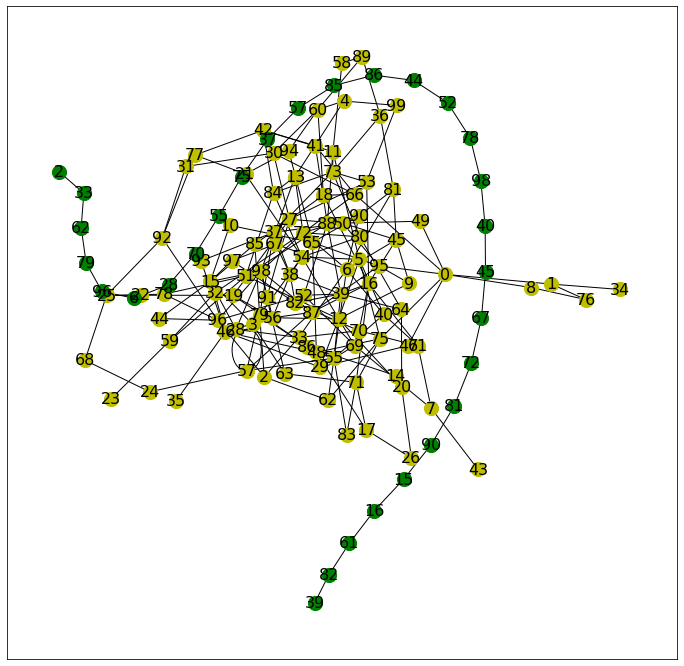

In [51]:
solution = nx.Graph()
solution.add_nodes_from( solve )
[ solution.add_edge(solve[i - 1], solve[i]) for i in range(1, len(solve))]

plt.figure(figsize=(12, 12))
nx.drawing.nx_pylab.draw_networkx(G,
                                  node_size=200,
                                   with_labels=True,
                                  font_size=16,
                                  node_color='y')
nx.drawing.nx_pylab.draw_networkx(solution,
                                  node_size=200,
                                   with_labels=True,
                                  font_size=16,
                                  node_color='g')


In [52]:
solve, secods = check_time(bfs, args=(adjacency_dict, 2))
print(solve) # Случа прохода всех возможных узлов

solve, secods = check_time(bfs, args=(adjacency_dict, 2, 39))
print(solve) # Случай поиска необходимого узла

[2, 33, 62, 79, 96, 6, 28, 70, 55, 75, 37, 57, 85, 86, 44, 52, 78, 98, 40, 45, 67, 72, 81, 90, 15, 16, 61, 82, 39, 48, 83, 0, 5, 71, 38, 50, 73, 93, 24, 87, 18, 14, 19, 69, 88, 25, 51, 13, 56, 91, 9, 97, 32, 66, 80, 36, 65, 3, 10, 53, 7, 64, 17, 29, 46, 1, 8, 47, 49, 95, 11, 12, 54, 63, 27, 84, 68, 60, 22, 41, 92, 59, 4, 30, 89, 94, 99, 43, 20, 26, 35, 34, 76, 42, 58, 21, 31, 77, 23]
[2, 33, 62, 79, 96, 6, 28, 70, 55, 75, 37, 57, 85, 86, 44, 52, 78, 98, 40, 45, 67, 72, 81, 90, 15, 16, 61, 82, 39]


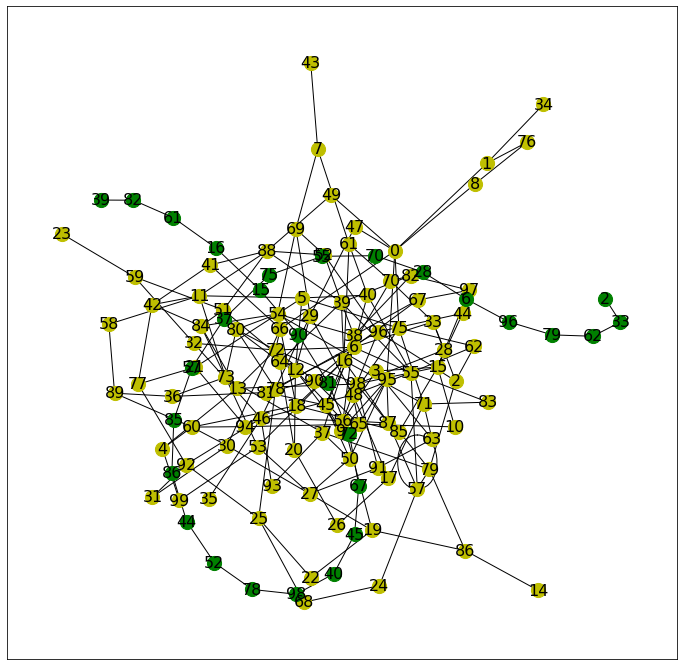

In [56]:
solution = nx.Graph()
solution.add_nodes_from( solve )
[ solution.add_edge(solve[i - 1], solve[i]) for i in range(1, len(solve))]

plt.figure(figsize=(12, 12))
nx.drawing.nx_pylab.draw_networkx(G,
                                  node_size=200,
                                   with_labels=True,
                                  font_size=16,
                                  node_color='y')
nx.drawing.nx_pylab.draw_networkx(solution,
                                  node_size=200,
                                   with_labels=True,
                                  font_size=16,
                                  node_color='g')


In [34]:
dfs_logs = []
bfs_logs = []
for n in tqdm(range(10, 2000)):
    N = n
    g = Graph()
    g.add_vertices(N)
    edges = [(i, j) for i, j in zip(np.random.randint(0, N, N * 2), np.random.randint(0, N, N * 2))]
    g.add_edges(edges)

    adjacency_matrix = g.get_adjacency() # adjacency matrix
    adjacency_list = convert_to_adjacency(adjacency_matrix) # adjacency list
    
    adjacency_dict = {key : adjacency_list[key] for key in range(N)}
    
    solve, secods_dfs = check_time(dfs, args=(adjacency_dict, 6))
    solve, secods_bfs = check_time(bfs, args=(adjacency_dict, 6))
    dfs_logs.append(secods_dfs)
    bfs_logs.append(secods_bfs)

  0%|          | 0/1990 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(dfs_logs, label='dfs_logs')
plt.plot(bfs_logs, label='bfs_logs')
plt.xlabel("The graph size", fontsize=15)
plt.ylabel("Time execution", fontsize=15)
plt.legend()
plt.show()